## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_mouse_study_data = pd.merge(mouse_metadata, study_results, on ="Mouse ID")


# Display the data table for preview
combined_mouse_study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the different Mouse ID.
combined_mouse_study_data["Mouse ID"].unique()

array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531',
      

In [3]:
# Checking the number of mice.
combined_count = len(combined_mouse_study_data["Mouse ID"].unique())
combined_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

Duplicated_ID = combined_mouse_study_data.loc[combined_mouse_study_data.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
Duplicated_ID

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.

Duplicate_MouseID_data = pd.DataFrame(combined_mouse_study_data.loc[combined_mouse_study_data["Mouse ID"] == "g989"])
Duplicate_MouseID_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

Clean_DataFrame = pd.DataFrame(combined_mouse_study_data.loc[combined_mouse_study_data["Mouse ID"] != "g989"])
Clean_DataFrame 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
len(Clean_DataFrame["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

GroupedMean = Clean_DataFrame.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
GroupedMedian = Clean_DataFrame.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
Groupedvariance = Clean_DataFrame.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
Grouped_std_dev = Clean_DataFrame.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
Grouped_SEM = Clean_DataFrame.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
#Grouped_SEM #print to check the values

# Assemble the resulting series into a single summary dataframe.

summary_table = {
    
    "Mean Tumor Volume" : GroupedMean,
    "Median Tumor Volume" : GroupedMedian,
    "Tumor Volume Variance" : Groupedvariance,
    "Tumor Volume Std. Dev." : Grouped_std_dev,
    "Tumor Volume Std. Err." : Grouped_SEM   
    
}

summary_tableDF = pd.DataFrame(summary_table)
summary_tableDF

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

#Example: result = df.groupby('Courses')['Fee'].aggregate(['min','max'])


AggregatedForm = Clean_DataFrame.groupby("Drug Regimen")["Tumor Volume (mm3)"].aggregate(["mean","median","var","std","sem"])
AggregatedForm 


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [14]:
sumDF = Clean_DataFrame.groupby(["Drug Regimen"]).sum()["Timepoint"]
sumDF

Drug Regimen
Capomulin    4960
Ceftamin     3515
Infubinol    3235
Ketapril     3705
Naftisol     3650
Placebo      3380
Propriva     2525
Ramicane     4885
Stelasyn     3480
Zoniferol    3525
Name: Timepoint, dtype: int64

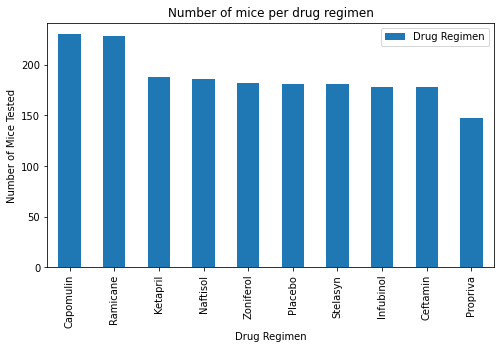

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

Number_of_mice_per_drug_regimen = Clean_DataFrame["Drug Regimen"].value_counts()
#Number_of_mice_per_drug_regimen

NewChart = pd.DataFrame(Number_of_mice_per_drug_regimen)
NewChart

NewChart.plot(kind ="bar", figsize = (8, 4.5))

plt.title("Number of mice per drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()
plt.tight_layout()

In [28]:
# checking the type of drug regimen 

Number_of_mice_per_drug_regimen = Clean_DataFrame["Drug Regimen"].unique()
Number_of_mice_per_drug_regimen

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

Text(0, 0.5, 'Number of Mice Tested')

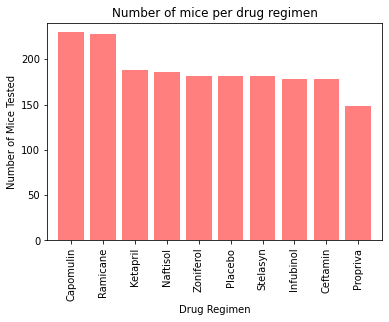

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#list the drug regimen for plotting the chart
Drug_Regimen = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol","Placebo", "Stelasyn", "Infubinol","Ceftamin", "Propriva"]
Number_of_mice_per_drug_regimen = Clean_DataFrame["Drug Regimen"].value_counts()
Number_of_mice_per_drug_regimen

x_axis = np.arange(len(Number_of_mice_per_drug_regimen))
#x_axis, print to check the array 

# Create a bar chart based upon the above data
plt.bar(x_axis, Number_of_mice_per_drug_regimen.values, color="r", alpha = 0.5, align="center")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,Drug_Regimen,rotation="vertical")
# Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0.25)

# Set the limits of the y axis
plt.ylim(0, max(Number_of_mice_per_drug_regimen)+10)

# Give the chart a title, x label, and y label
plt.title("Number of mice per drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")




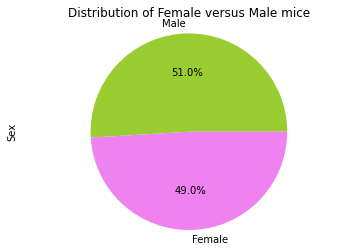

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

female_versus_male_distribution = Clean_DataFrame["Sex"].value_counts()
#female_versus_male_distribution

Distribution_pie = female_versus_male_distribution.plot(kind="pie", y= "Sex",autopct="%1.1f%%",colors= ("yellowgreen","violet"),title=("Distribution of Female versus Male mice"))

Distribution_pie.set_ylabel("Sex")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()



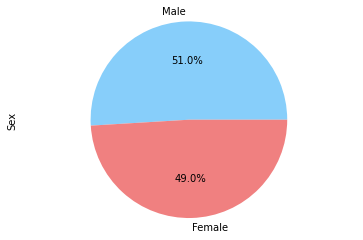

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#female_versus_male_distribution = Clean_DataFrame["Sex"].value_counts()
#female_versus_male_distribution

Sex = ["Male","Female"]
Count_of_male_and_female_mice = [958,922]
colors =["lightskyblue", "lightcoral"]

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(Count_of_male_and_female_mice, labels= Sex, colors=colors,
        autopct="%1.1f%%")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
GreatestTimepoint = Clean_DataFrame.groupby(["Mouse ID"]).max()["Timepoint"]
#GreatestTimepoint

#convert into a data frame
GreatestTimepointDF = pd.DataFrame(GreatestTimepoint)
GreatestTimepointDF


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

Merged_Clean_data = pd.merge(GreatestTimepointDF,Clean_DataFrame, how = "left" ,on = (["Mouse ID", "Timepoint"]) )
Merged_Clean_data.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [20]:
# Put treatments into a list for for loop (and later for plot labels)

Drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_list = []

#Locate the rows which contain mice on each drug and get the tumor volumes
#Loop through each drug in the Drug list, locating the rows in the merged DataFrame that correspond to each treatment drug.
#Append the resulting final tumor volumes for each drug to the empty list.
#Calculate the IQR and quantitatively determine if there are any potential outliers.        

for drug in Drug_list:
     
    tumor_vol_per_drug_regimen = Merged_Clean_data.loc[Merged_Clean_data["Drug Regimen"] == drug,"Tumor Volume (mm3)"] 
    
    tumor_vol_list.append(tumor_vol_per_drug_regimen) 
    quartiles =  tumor_vol_per_drug_regimen.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"{drug}'s potential outliers: {lower_bound:,.2f} {upper_bound:,.2f}")

#tumor_vol_list


Capomulin's potential outliers: 20.70 51.83
Ramicane's potential outliers: 17.91 54.31
Infubinol's potential outliers: 36.83 82.74
Ceftamin's potential outliers: 25.36 87.67


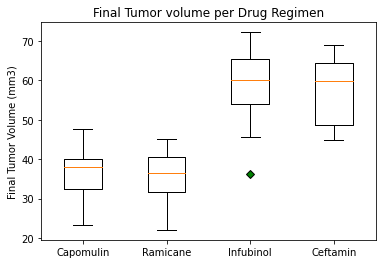

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
#change the shape and color of the outlier
green_diamond = dict(markerfacecolor='g', marker='D')
# Label the axis
ax1.set_title('Final Tumor volume per Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')

 
ax1.boxplot(tumor_vol_list, labels= Drug_list, flierprops=green_diamond)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

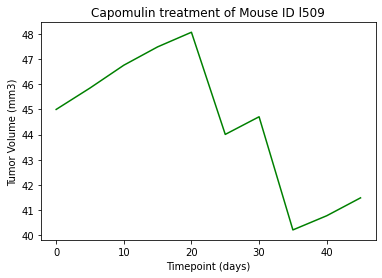

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#tumorVolume_capomulin = Merged_Clean_data.loc[Merged_Clean_data["Drug Regimen"] == "Capomulin"]
#tumorVolume_capomulin

#I choose Mouse ID l509
tumorVolume_capomulin_mouseID = Clean_DataFrame.loc[Clean_DataFrame["Mouse ID"] == "l509"]
#tumorVolume_capomulin_mouseID

#convert into a dataframe 
tumorVolumeDF = pd.DataFrame(tumorVolume_capomulin_mouseID)
#tumorVolumeDF

#Optional to reduce the columns inorder to get a cleaner view of the table 
tumorVolume_capomulin_ReducedDF = pd.DataFrame(tumorVolumeDF[["Mouse ID","Drug Regimen", "Timepoint", "Tumor Volume (mm3)" ]]) 
#tumorVolume_capomulin_ReducedDF

tumorVolume_capomulin_ReducedDF = tumorVolume_capomulin_ReducedDF.set_index("Mouse ID")
#tumorVolume_capomulin_ReducedDF

timepoints_Capomulin = tumorVolume_capomulin_ReducedDF["Timepoint"]
#timepoints_Capomulin

tumor_volume_per_timepoint_capomulin = tumorVolume_capomulin_ReducedDF["Tumor Volume (mm3)"]
#tumor_volume_per_timepoint_capomulin
plt.plot(timepoints_Capomulin, tumor_volume_per_timepoint_capomulin, color = "green" , label = "Capomulin" )


plt.title("Capomulin treatment of Mouse ID l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

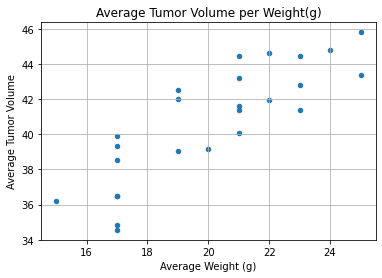

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Finding all the data with the capomulin regimen
tumorVolume_capomulin = Clean_DataFrame.loc[Clean_DataFrame["Drug Regimen"] == "Capomulin"]
tumorVolume_capomulin 

# convert into a DataFrame for getting the average tumor volume for each mouse ID
tumorVolume_capomulinDF = pd.DataFrame(tumorVolume_capomulin)
tumorVolume_capomulinDF

#calculating the average tumor volumer per mouse id 
Avg_tumor_volume = tumorVolume_capomulin.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]
Avg_tumor_volume

#calculating the average weight per mouse id 
Avg_weight_per_Mouse_ID = tumorVolume_capomulinDF.groupby(["Mouse ID"]).mean()["Weight (g)"]
Avg_weight_per_Mouse_ID


# Creating a new DataFrame for plotting the scatter plot
NewTable = {
    
    "Average Tumor Volume" : Avg_tumor_volume,
    "Average Weight (g)"   : Avg_weight_per_Mouse_ID
}

Avg_tumor_weight_DF = pd.DataFrame(NewTable )
Avg_tumor_weight_DF


# Plotting the scatter plot 
Avg_tumor_weight_DF.plot(kind = "scatter", x ="Average Weight (g)" , y ="Average Tumor Volume" , title = "Average Tumor Volume per Weight(g)", grid = True)
plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


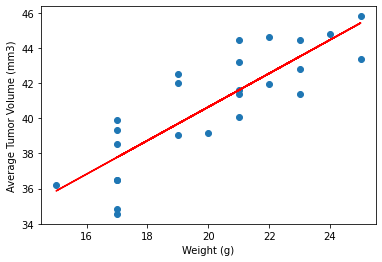

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Getting the dataframe from the above cell 
Avg_tumor_weight_DF

avg_weight = Avg_tumor_weight_DF["Average Weight (g)"]
avg_tumor = Avg_tumor_weight_DF["Average Tumor Volume"]


correlation = st.pearsonr(avg_weight ,avg_tumor )
plt.scatter(avg_weight,avg_tumor)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

# calculate the linear regression equation and add line to plot

(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_weight, avg_tumor)
regress_values = avg_weight * slope + intercept
plt.plot(avg_weight,regress_values,"r-")
plt.show()